- Limits of logistic regression
- Principle of SVM and margin
- SVM and kernels
- Regularization on SVMs

## Classification 🌺

<img src="https://www.retroplanet.com/mm5/graphics/00000006/164544_main.jpg" />

Today we will focus on **Classification** problems - which means:
- **supervised** learning (with labeled data)
- with **categorical (also called discrete) data** (as opposed to Regression problems which work on continuous data)

___

# I. Different ML classification models

## I.1. There are many ML classification models - with specificities

Suppose you want to classify data points between 2 labels (ex: spam/not spam).

There are various Machine Learning **models**. They all work differently and will have a different output.

Suppose we visualize all emails as points on a 2D charts : they will all draw different separation boundaries.

<img src="https://cdn-images-1.medium.com/max/2000/1*M6djHnMzmTu4c0CN58Dxpg.png" width="900px" align="center"/>

Let's explore two of the most classical ML classification models:
- **k-Nearest Neighbors**
- **Logistic Regression**

## I.2. k-Nearest-Neighbors 🏘

#### Nearest Neighbors

The Nearest Neighbors model is very rarely used in practice, but it will allow us to get an idea about the basic approach to a classification problem.

The idea is very simple: for one test data point, we find the closest point in our training dataset and we use this label as the prediciton label for our test data point.

For example, suppose we want to classify an image in 1 out of 3 classes (ex: cat, dog or horse). The nearest neighbor classifier will take a test image, compare it to every single one of the training images, and predict the label of the closest training image.

If we visualize our training data points on a 2-dimension charts, we can plot **decision boundaries** which will indicate the **prediction label** of any new test data point we choose.

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png" width="300px" />
</p>

#### k-Nearest Neighbors

k-Nearest-Neighbors is a classical Machine Learning algorithm that is a *generalization* of the Nearest Neighbors algorithm: 

This time, for one test data point, we find the **top-k closest points**, and have them **vote on the label** of the test data point.


<img src="https://cs231n.github.io/assets/knn.jpeg" width="800px" align="center"/>


> 🔦 **Hint**: In particular, when k = 1, we recover the Nearest Neighbor classifier. Intuitively, higher values of k have a smoothing effect that makes the classifier more resistant to outliers.


> 📚 *Resources*: [Live visualization of k-NN algorithm](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

### Example of decision boundaries

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1pK6gdra8yk1LWH3Pxv6bVnliFB8bqXS3" width="300">
</p>

## I.3. Logistic Regression 🌊

**Logistic Regression** is also a classical Machine Learning algorithm.

It is a **must-have** in your toolbox as it is very **effective and simple** to implement.

> 🔦 **Hint**: when approaching a ML problem, you can always start by implementing a simple algorithm to have a first benchmark of performance.

<img src="https://drive.google.com/uc?export=view&id=1D4zZjM11aZCsPWJJIR6JTP_0lMCxqTJH" width="900">

> 🔦 **Hint**: Why is it called **Logistic Regression** despite it being mostly used for classification problems?
>
> The LR algorithm treats the discrete output variable (Yes or No) as a continuous one (0 to 1).
>
> It tries to fit the **logit** function : $\frac{1}{1+exp(-x)}$ to the data, hence **Logistic Regression** 

___

# II. ML is easy to implement with [`scikit-learn`](http://scikit-learn.org/)

## II.0 Introducing [`scikit-learn`](http://scikit-learn.org/)

**`scikit-learn`** is an open source Python **machine learning library**.

Shootout to the French orignal author: [David Cournapeau](https://twitter.com/cournape) and to the [rest of the team](https://en.wikipedia.org/wiki/Scikit-learn) that rewrote and enriched the library 🇫🇷 

It features various classification, regression and clustering algorithms, along with multiple useful functions (preprocessing for example) when working on Machine Learning problems.

You will see it is very simple to use yet super efficient.

![](https://drive.google.com/uc?export=view&id=1KgYL65P1q1HAL3e7l5qU8LtTSi7MrGWt)

## II.1. Let's define a problem 🌺

`scikit-learn` comes with a few standard (and famous) datasets.

For instance the **Iris** dataset:

This dataset consists of 3 different types of flowers: *Setosa, Versicolour, and Virginica*. This corresponds to the **label** (also called **class**) we aim to predict.

Each row corresponds to one flower observation.

The columns contain the **features** (or characteristics) of the observerd flower: *Sepal Length, Sepal Width, Petal Length and Petal Width*.

<p align="center">
<img src="https://cdn-images-1.medium.com/max/1600/0*7H_gF1KnslexnJ3s" width="500px"/>
</p>

This dataset is really famous and serves as benchmark for various classification algorithms.

Let's load this example dataset and visualize our data.

In [2]:
#  Let's visualize this dataset on a 2-dimension chart using 2 first features
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[:,:2] # We keep only 2 features for visualisation purposes

In [3]:
print("X.shape={}".format(X.shape))
print("y.shape={}".format(y.shape))

X.shape=(150, 2)
y.shape=(150,)


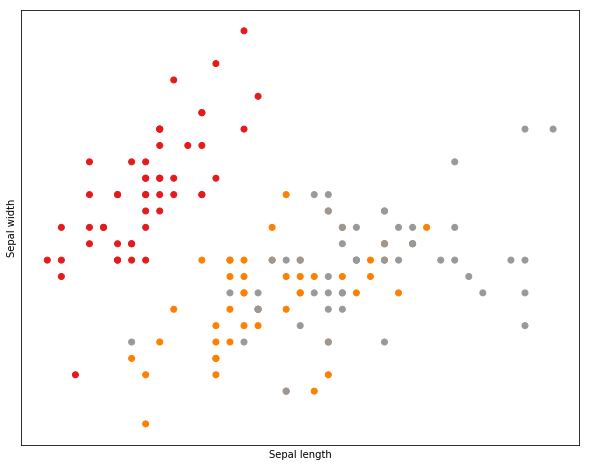

In [5]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(10, 8))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

## II.2. Training a Machine Learning algorithm

In our case of the iris dataset, the task is to predict, given a flower observation (and the characteristics we collected on this flower - sepal lenght, etc.), which kind of flower it is.

We are given samples of each of the 3 possible flowers (Setosa, Versicolour, and Virginica), on which we fit a model to predict the classes to which unseen samples belong.

For now, it is ok to consider our model as a black box.

The machine learning process is done in 3 simple steps:

1. First we instanciate a model using scikit-learn library, for example a `KNeighborsClassifier`.
2. Then we **fit** our model on our training data
3. Finally we retrieve the **prediction** of our trained model on all our data. We will see later that we will want to test our model on **data unseen during training**.

In [6]:
# 1 - We instanciate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # We specify k=3 (number of neighbors)

In [7]:
# 2 - Then we train our model using the `fit` method`
knn.fit(X=X, y=y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
# 3 - Finally we retrieve a prediction on our data using only the features columns
y_pred = knn.predict(X)

We can get a better understanding of our model by plotting the decision boundaries

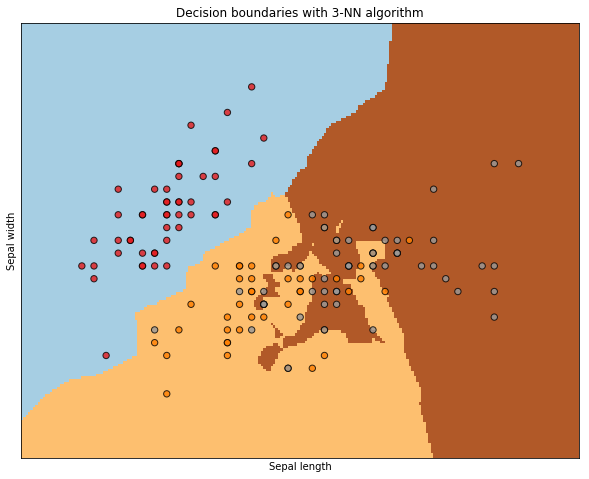

In [10]:
import numpy as np

# Create figure to draw chart
plt.figure(figsize=(10, 8))

# We create a grid of points contained within [x_min, x_max], [y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_knn, cmap=plt.cm.Paired)

# Plot the data points color-coded by their class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, alpha=0.8, edgecolor='k', s=40)
# Format chart
plt.title("Decision boundaries with 3-NN algorithm")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

And finally we can evaluate our model by computing the score (accuracy) of our model. It corresponds to the **percentage of good predictions** (we compare y_pred with y).

In [11]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

print("Model has an accuracy of {}%".format(round(acc*100), 2))

Model has an accuracy of 85.0%


## II.3. Let's solve it with another algorithm: Logistic Regression

Again, we instanciate a `LogisticRegression` model

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Then we fit the model to our data

In [13]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Finally we can retrieve predictions based on our model

In [14]:
y_pred = lr.predict(X)

We can get a better understanding of our model by plotting the decision boundaries

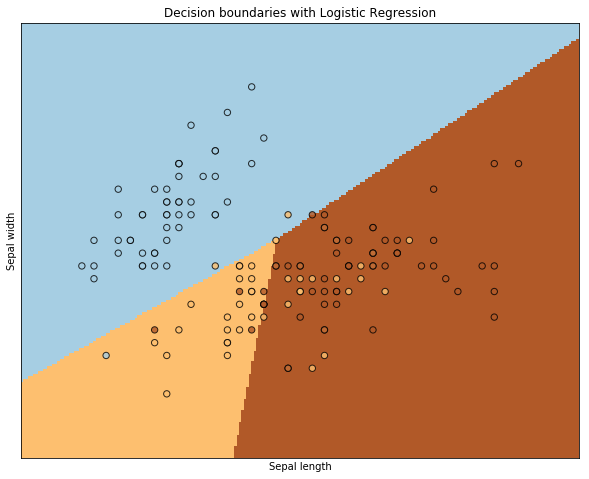

In [15]:
import numpy as np

# Create figure to draw chart
plt.figure(figsize=(10, 8))

# We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_lr, cmap=plt.cm.Paired)

# And plot the testing point in white
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)


# Format chart
plt.title("Decision boundaries with Logistic Regression")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

And finally we can evaluate the global **accuracy** of our model by computing the **score** (number of good predictions over total number of predictions).

In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

print("Model has an accuracy of {}%".format(round(acc*100), 2))

Model has an accuracy of 77.0%


___

# IV. Other popular classification models

## III.1. Naive Bayes

**Naive Bayes classifiers** are a family of simple "probabilistic classifiers" based on **Bayes' theorem**.

It implies a strong (this is why this algorithm is considered *naive*) **independence assumptions between the features**. 

> 📚 **Resources**: Read more on [Naive Bayes algorithms](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) and on [Naive Bayes spam filtering](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering) 📩

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1JVzJXqW-n5zaSAB1HWpF_JLCDfNWVFx0">
</p>

Let's take an example:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1_sqdZEhlrpc771fKtr6mScj36awedn1x">
</p>

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=19pTAAg6wMxQnwzWtRl8uB4GBOtbdJcKb">
</p>

In [21]:
# scikit-learn implementation
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)
acc = accuracy_score(y, y_pred)
print("Naive Bayes model has an accuracy of {}%".format(round(acc*100), 2))

Naive Bayes model has an accuracy of 78.0%


### Example of decision boundaries

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1kFkjsi9XNmt4vSkfALB1aFWKjcXy0OYS" width="350">
</p>

## III.2. Support Vector Machines

**SVM** are quite recent, as the original algorithm was invented in 1963.

A **support-vector machine** constructs what is called a **hyperplane** (a separation - such a line in 2D space, or a surface plane in 3D) to separate classes. 

There might be many hyperplanes that might classify the data. One reasonable choice as the best separation is the one that has **the largest distance to the nearest training-data point of any class** (we call this distance the **margin**).

> 📚 **Resources**: Read more on [Support Vector Machines](https://en.wikipedia.org/wiki/Support-vector_machine)

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=14Wc6tcVMbCwT_0ne4jSH6pjhL0CVly-B" width="350">
</p>

- H1 does not separate the classes at all
- H2 does, but only with a small margin
- H3 separates them with the maximal margin

In [24]:
# scikit-learn implementation
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X, y)
y_pred = svc.predict(X)
acc = accuracy_score(y, y_pred)
print("SVM model has an accuracy of {}%".format(round(acc*100), 2))

SVM model has an accuracy of 82.0%


### The Kernel Trick

In addition to performing **linear classification** (separating classes with a line), SVMs can efficiently perform a **non-linear classification** using what is called the **kernel trick**, by replacing the usual dot product (for computing the distances) by a non linear function.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1UTyeUCAGFgU_NbiFE5xqmqRuKm2BpNM5" width="400">
</p>

In [27]:
# scikit-learn implementation

svc_k = SVC(kernel="rbf")
svc_k.fit(X, y)
y_pred_k = svc_k.predict(X)
acc_k = accuracy_score(y, y_pred_k)
print("SVM model (with the kernel trick) has an accuracy of {}%".format(round(acc_k*100), 2))

SVM model (with the kernel trick) has an accuracy of 83.0%


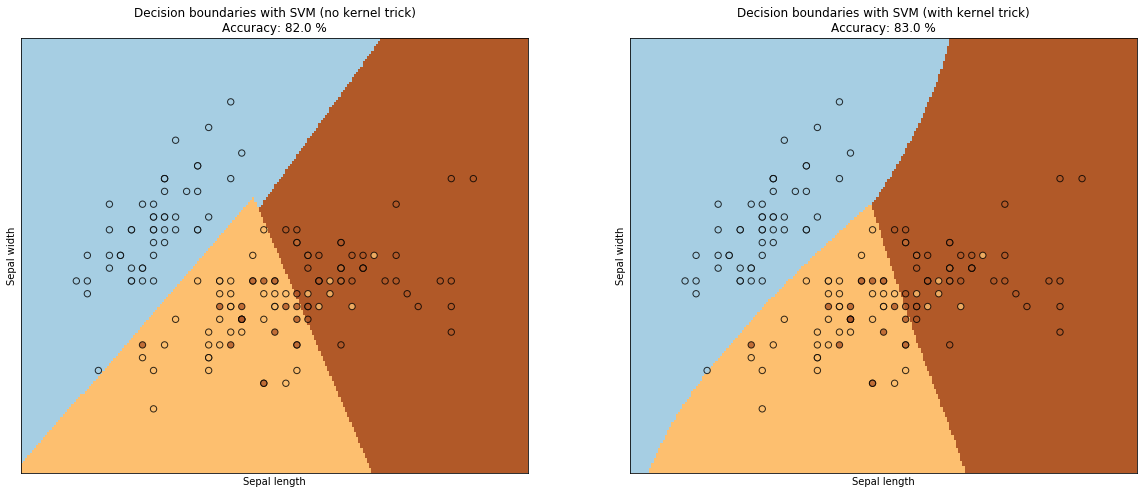

In [32]:
# Create figure to draw chart
plt.figure(figsize=(20, 8))

# We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svc = Z_svc.reshape(xx.shape)

Z_svc_k = svc_k.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svc_k = Z_svc_k.reshape(xx.shape)

plt.subplot(1, 2, 1)
# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_svc, cmap=plt.cm.Paired)

# And plot the testing point in white
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)

# Format chart
plt.title(f"Decision boundaries with SVM (no kernel trick)\nAccuracy: {round(acc*100)} %")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())


plt.subplot(1, 2, 2)
# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_svc_k, cmap=plt.cm.Paired)

# And plot the testing point in white
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolors='k',cmap=plt.cm.Paired, alpha=0.8, s=40)

# Format chart
plt.title(f"Decision boundaries with SVM (with kernel trick)\nAccuracy: {round(acc_k*100)} %")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

### Examples of decision boundaries

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1zIvg6xR4PPCvegzTbfyvLvcahs16mGvI" width="400">
</p>

## III.3. Trees and forests 🌳🌳🌳

We will talk about this category of models later 🙂